# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (Cgit@github.com:Davinder-Dole/project1.gitSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []



# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
print(len(cities))


614


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = api_key
units = "imperial"
query_url = base_url + "appid=" + api_key + "&units=" + units + "&q="

search_data=[]
cityList = []
countryList = []

searchCnt = 0
print("Beginning Data Retrieval")
print("---------------------------------------")
for city in cities:
    searchCnt += 1
    response= requests.get(query_url + city).json()
    print(f"Processing record {searchCnt} : {city}") 
    searchCityID = response.get("id")
    if response.get("id"):
        search_data.append(response)
        cityList.append(city)
        countryList.append(cities[searchCnt-1])
    else:
        print(f"City not found. Skipping...: {city}")
          
print("---------------------------------------")
print("Processing Complete")
    


Beginning Data Retrieval
---------------------------------------
Processing record 1 : kitakata
Processing record 2 : albany
Processing record 3 : ushuaia
Processing record 4 : mataura
Processing record 5 : qaanaaq
Processing record 6 : busselton
Processing record 7 : illoqqortoormiut
City not found. Skipping...: illoqqortoormiut
Processing record 8 : bargal
City not found. Skipping...: bargal
Processing record 9 : carnarvon
Processing record 10 : arlit
Processing record 11 : srednekolymsk
Processing record 12 : les cayes
Processing record 13 : alyangula
Processing record 14 : bandarbeyla
Processing record 15 : mahebourg
Processing record 16 : khatanga
Processing record 17 : east london
Processing record 18 : sorvag
City not found. Skipping...: sorvag
Processing record 19 : nikolskoye
Processing record 20 : rikitea
Processing record 21 : amderma
City not found. Skipping...: amderma
Processing record 22 : bluff
Processing record 23 : chipinge
Processing record 24 : bredasdorp
Processing

Processing record 229 : cidreira
Processing record 230 : grand river south east
City not found. Skipping...: grand river south east
Processing record 231 : ishigaki
Processing record 232 : sikasso
Processing record 233 : davlekanovo
Processing record 234 : fort saint john
City not found. Skipping...: fort saint john
Processing record 235 : najran
Processing record 236 : viligili
City not found. Skipping...: viligili
Processing record 237 : rawannawi
City not found. Skipping...: rawannawi
Processing record 238 : kashi
City not found. Skipping...: kashi
Processing record 239 : amahai
Processing record 240 : jaisalmer
Processing record 241 : geraldton
Processing record 242 : kaitangata
Processing record 243 : bambous virieux
Processing record 244 : mandurah
Processing record 245 : adrar
Processing record 246 : lamar
Processing record 247 : santo antonio do leverger
Processing record 248 : kuchera
Processing record 249 : antalaha
Processing record 250 : dayong
Processing record 251 : nakho

Processing record 449 : namibe
Processing record 450 : gat
Processing record 451 : pisco
Processing record 452 : bathsheba
Processing record 453 : tessalit
Processing record 454 : beloha
Processing record 455 : tabat
Processing record 456 : nahavand
Processing record 457 : lloydminster
Processing record 458 : shizunai
Processing record 459 : perama
Processing record 460 : aklavik
Processing record 461 : faridan
City not found. Skipping...: faridan
Processing record 462 : tateyama
Processing record 463 : copiapo
Processing record 464 : saint pete beach
Processing record 465 : santa vitoria do palmar
Processing record 466 : richards bay
Processing record 467 : gillette
Processing record 468 : maine-soroa
Processing record 469 : pitimbu
Processing record 470 : pucara
Processing record 471 : tazovskiy
Processing record 472 : karwar
Processing record 473 : solwezi
Processing record 474 : maragogi
Processing record 475 : rybinsk
Processing record 476 : ucluelet
Processing record 477 : san ra

In [7]:
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
dates = []
for data in search_data:
    latitude.append(data.get("coord").get("lat"))
    longitude.append(data.get("coord").get("lon"))
    temperature.append(data.get("main").get("temp"))
    humidity.append(data.get("main").get("humidity"))
    cloudiness.append(data.get("clouds").get("all"))
    wind_speed.append(data.get("wind").get("speed"))
    dates.append(data.get("dt"))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
print(f"City      {len(cityList)}")
print(f"Lat       {len(latitude)}")
print(f"Lng       {len(longitude)}")
print(f"Max Temp  {len(temperature)}")
print(f"Humidity  {len(humidity)}")
print(f"Cloudiness{len(cloudiness)}")
print(f"Wind Speed{len(wind_speed)}")
print(f"Date      {len(dates)}")
print(f"Country   {len(countryList)}")

City      562
Lat       562
Lng       562
Max Temp  562
Humidity  562
Cloudiness562
Wind Speed562
Date      562
Country   562


In [11]:
weather_df = pd.DataFrame({"City": cityList,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Humidity": humidity,
                           "Max Temp": temperature,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Date": dates,
                            })
weather_df.head()
weather_df.to_csv("../weather.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

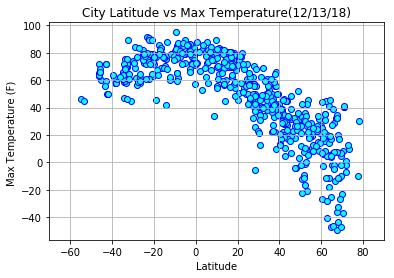

In [12]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], marker="o",color='cyan',edgecolors='b')

plt.title("City Latitude vs Max Temperature(12/13/18)")
plt.ylabel("Max Temperature (F) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-70,90)
plt.savefig("../Images/latvstemp.jpeg")
plt.show()


#### Latitude vs. Humidity Plot

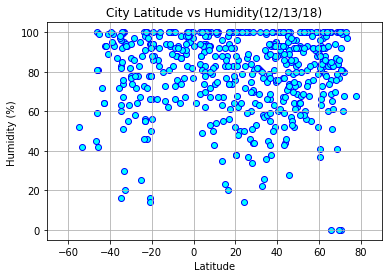

In [57]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o",color='cyan',edgecolors='b')

plt.title("City Latitude vs Humidity(12/13/18)")
plt.ylabel("Humidity (%) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-70,90)

plt.show()

#### Latitude vs. Cloudiness Plot

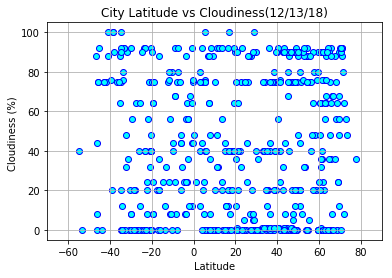

In [59]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o",color='cyan',edgecolors='b')

plt.title("City Latitude vs Cloudiness(12/13/18)")
plt.ylabel("Cloudiness (%) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-70,90)

plt.show()

#### Latitude vs. Wind Speed Plot

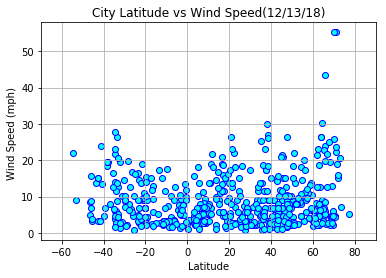

In [60]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o",color='cyan',edgecolors='b')

plt.title("City Latitude vs Wind Speed(12/13/18)")
plt.ylabel("Wind Speed (mph) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-70,90)

plt.show()